# The PyData Stack

In this lab, you should analyze the famous [Boston Housing Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).  Here's what you should do:

* Load the data into a DataFrame and determine the purpose of the dataset.
* Determine some basic statistics about the features.  Is there any missing data?  How do you know?
* Decide what all the features mean, and their type (hint: explore the stats of each, and the object returned by `load_boston` in the link above).
* Graph histograms of a few appropriate features, and describe what you see.
* Graph scatter plots of the numerical features against the median house price.  What do you take from these graphs?
* Slice the dataset _horizontally_, that is, use boolean indexing to create a sub-DataFrame from your data.  You should find a way to slice it that does something nontrivial: describe why what you've done is interesting (take a look at some of our previous notebooks for examples).
* Create another graph that justifies that the above is interesting.
* Knowing that this datset is typically used in regression to predict the value of the house, slice the data _vertically_, that is, remove some columns that you believe are not helpful for this task.  Justify your reasoning (from the steps you've taken before this).
* Throughout all of the above, discuss what you're seeing in markdown cells, and use markdown appropriately to create headers to break up the analysis.  It's okay if you're wrong or just confused/unsure about your observations--this lab is about experimentation and playfulness with data!

Let us load in some basic stats!

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We see a bunch of features and a bunch of numbers, but what they really mean?

In [2]:
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
print(boston.DESCR) #description
print(bos.describe()) # some basic statistical information including percentiles and mean/median

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The purpose of this dataset seems to be to predict prices of houses given other factors. First we search through the dataset for missing values. 

In [3]:
print(bos.isnull().sum()) # checking for null data values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


This searches through all features and sees counts the sum of all NULL values for each feature. We see all 0's so that means that there are no missing data values. Now let's plot some histograms.

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

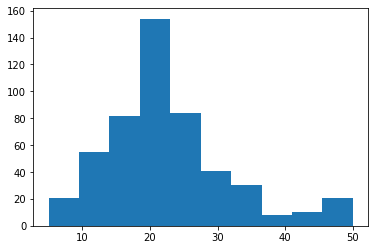

In [4]:
plt.hist(df_boston['target'])

As we can see, the distribution of prices of houses actually roughly follows a normal distribution, though it is slightly skewed left, and it seems like there are a lot of houses on the right end of the spectrum (expensive).


Now let's create a correlation matrix in order to see the relationships between different variables!

<AxesSubplot:>

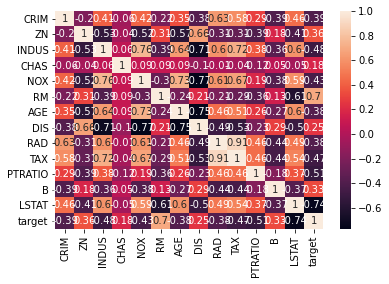

In [5]:
correlation_matrix = df_boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Of course, we see a couple of ones, but that is because a variable always has perfect correlation with itself. Aside from variable to self correlation, we see that there is a strong negative correlation between LSTAT and target, which upon interpretation means that a higher population of lower status people correlates negatively with higher house prices. 

From an purely numerical point of view this dehumanizes people of lower economic status, implying that neighborhoods with them are "bad" because they are worth less. Now let's graph the scatter plot betweeen LSTAT and target:


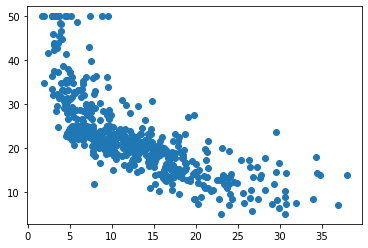

In [6]:
plt.scatter(x = df_boston['LSTAT'], y  = df_boston['target'])

It appears as if it is an almost perfect negative correlation, since lower LSTAT almost certainly yields higher target house price than higher LSTAT.